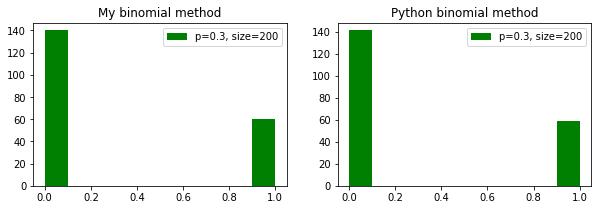

In [3]:
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit

def miBinomial(p):
    a = []
    for i in range(200):
        if np.random.random()<=p:
            a.append(1)
        else:
            a.append(0)
    return a
            
d1 = miBinomial(0.3)
d2 = np.random.binomial(1,0.3,200)
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.hist(d1, color='g', label='p=0.3, size=200')
plt.legend()
plt.title('My binomial method')
plt.subplot(1,2,2)
plt.hist(d2, color='g', label='p=0.3, size=200')
plt.legend()
plt.title('Python binomial method')
plt.show()

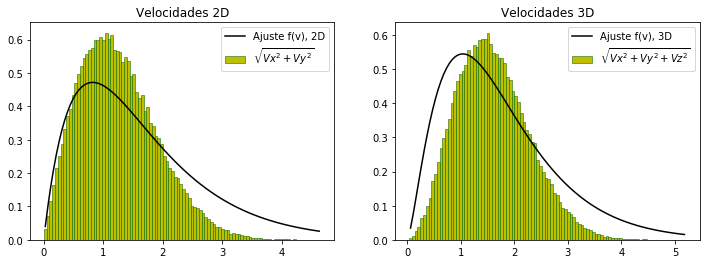

R2 Velocidades 2D:  0.8781
R2 Velocidades 3D:  0.8600
Vp 2D teo=  0.472 , Vp distribución=  0.620 %e=  0.316
Vp 3D teo=  0.545 , Vp distribución=  0.607 %e=  0.114
V prom 2D teo=  0.532 , V prom ajuste=  0.221 %e=  0.584
V prom 3D teo=  0.615 , V prom ajuste=  0.235 %e=  0.618


In [12]:
vx = np.random.normal(0,1,100000)
vy = np.random.normal(0,1,100000)
vz = np.random.normal(0,1,100000)

def vel2D(M,v):
    y = M*v*np.exp(-M*v**2/2)
    return y

def vel3D(M,v):
    y = (2/np.pi)**0.5*M**1.5*v**2*np.exp(-M*v**2/2)
    return y

def R2(y, y1):
    y2 = y1-y
    r2 = 1-(np.var(y2)/np.var(y))
    return r2

plt.figure(figsize=(12,4))
vxy = np.sqrt(vx**2+vy**2)
plt.subplot(1,2,1)
y, x, fig1 = plt.hist(vxy, bins=100, density='true', color='y', edgecolor = 'darkgreen',  linewidth=0.5, label='$\sqrt{Vx^2+Vy^2}$')
x = (x[1:]+x[:-1])*0.5
popt,pcov=curve_fit(vel2D,x,y)
plt.plot(x,vel2D(x,*popt), c='k', label='Ajuste f(v), 2D')
plt.legend()
plt.title('Velocidades 2D')

vxyz = np.sqrt(vx**2+vy**2+vz**2)
plt.subplot(1,2,2)
y1, x1, fig2 = plt.hist(vxyz, bins=100, density='true', color='y', edgecolor = 'darkgreen',  linewidth=0.5, label='$\sqrt{Vx^2+Vy^2+Vz^2}$')
x1 = (x1[1:]+x1[:-1])*0.5
popt1,pcov1=curve_fit(vel3D,x1,y1)
plt.plot(x1,vel3D(x1,*popt1), c='k', label='Ajuste f(v), 3D')
plt.legend()
plt.title('Velocidades 3D')
plt.show()
a = R2(y, vel2D(x,*popt))
print('R2 Velocidades 2D: ', '%.4f'%a)
b = R2(y1, vel3D(x1,*popt1))
print('R2 Velocidades 3D: ', '%.4f'%b)

Vp2D = np.asarray(y).max()
Vp3D = np.asarray(y1).max()
Vp2Dteo = vel2D(x,*popt).max()
Vp3Dteo = vel3D(x1,*popt1).max()
e = abs(Vp2D-Vp2Dteo)/Vp2Dteo
e1 = abs(Vp3D-Vp3Dteo)/Vp3Dteo

Vp2Dprom = vel2D(x,*popt).mean()
Vp3Dprom = vel3D(x1,*popt1).mean()
Vp2Dpteo = 2*Vp2Dteo/np.pi**0.5
Vp3Dpteo = 2*Vp3Dteo/np.pi**0.5
e2 = abs(Vp2Dprom-Vp2Dpteo)/Vp2Dpteo
e3 = abs(Vp3Dprom-Vp3Dpteo)/Vp3Dpteo

print('Vp 2D teo= ', '%.3f'%Vp2Dteo, ', Vp distribución= ', '%.3f'%Vp2D, '%e= ', '%.3f'%e)
print('Vp 3D teo= ', '%.3f'%Vp3Dteo, ', Vp distribución= ', '%.3f'%Vp3D, '%e= ', '%.3f'%e1)
print('V prom 2D teo= ', '%.3f'%Vp2Dpteo, ', V prom ajuste= ', '%.3f'%Vp2Dprom, '%e= ', '%.3f'%e2)
print('V prom 3D teo= ', '%.3f'%Vp3Dpteo, ', V prom ajuste= ', '%.3f'%Vp3Dprom, '%e= ', '%.3f'%e3)

Como se puede observar el $R^2$ que más se acerca a 1 es el del ajuste de la velocidad en dos dimensiones por lo cual este es el mejor modelo. Por otro lado se observa que los valores de Vp y V promedio obtenidos de la distribución no se acarcan a los teoricos puesto que tienen errores de entre 10 y 30% y entre 50 y 60% respectivamente.

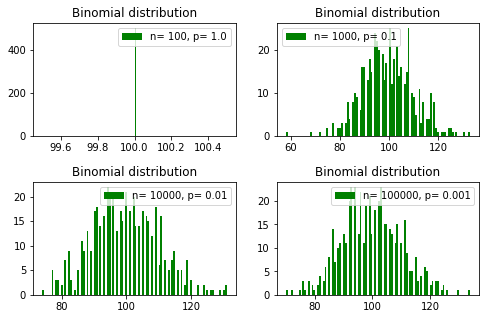

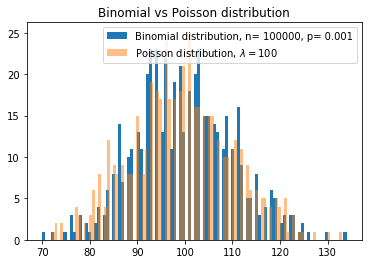

In [5]:
n = 10
p = 10

plt.figure(figsize=(8,5))

for i in range(4):
    n *= 10
    p /= 10
    bd = np.random.binomial(n,p,500)
    plt.subplot(2,2,i+1)
    plt.hist(bd, bins=100, color='g', label='n= '+str(n)+', p= '+str(p))
    plt.legend()
    plt.title('Binomial distribution')
    
plt.subplots_adjust(hspace=0.4)
plt.show()

pd = np.random.poisson(n*p,500)
plt.hist(bd,bins=100,label='Binomial distribution, n= '+str(n)+', p= '+str(p))
plt.hist(pd,bins=100,alpha=0.5,label='Poisson distribution, $\lambda= $'+str(int(n*p)))
plt.legend()
plt.title('Binomial vs Poisson distribution')
plt.show()

In [6]:
def Expected(px):
    resp = 0
    for i in range(len(px)):
        resp += px[i]*(i)**2
    return resp

def test1():
    px = np.array([ 0.01720472,  0.23565573,  0.7425048 ,  0.68060143,  0.25665851])
    res = 13.437623957331406
    ans = Expected(px)
    print(ans)
    return (abs(res-ans) < 0.00001)

print(test1())

13.43762396
True


In [11]:
def probability(p0):
    N = 5*p0*1000
    B = (1-p0)**5*1000
    B = N/B
    return B

def test2():
    p0 = 0.7
    res = 1440.3292181069949
    ans = probability(p0)
    print(ans)
    return (abs(res-ans) < 0.001)

print(test2())

1440.329218106995
True
